<a href="https://colab.research.google.com/github/labib2537/Data-Mining-and-ML/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [460]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [462]:
train = pd.read_csv('gdrive/My Drive/OOP-2 Project/Project Code and CSV file/bank.csv')
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Data preprocessing**

In [464]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [465]:
y = train['deposit']
X = train.drop('deposit', axis=1)

In [466]:
def get_categorical_features(df):
    return [feature for feature in df.columns if df[feature].dtype == 'object']

In [467]:
get_categorical_features(X)

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [468]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [469]:
get_uniques(X, get_categorical_features(X))

{'contact': ['unknown', 'cellular', 'telephone'],
 'default': ['no', 'yes'],
 'education': ['secondary', 'tertiary', 'primary', 'unknown'],
 'housing': ['yes', 'no'],
 'job': ['admin.',
  'technician',
  'services',
  'management',
  'retired',
  'blue-collar',
  'unemployed',
  'entrepreneur',
  'housemaid',
  'unknown',
  'self-employed',
  'student'],
 'loan': ['no', 'yes'],
 'marital': ['married', 'single', 'divorced'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep'],
 'poutcome': ['unknown', 'other', 'failure', 'success']}

In [470]:
X = X.replace('unknown', np.NaN)

In [471]:
X.isna().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
dtype: int64

In [472]:
X.drop('poutcome', axis=1, inplace=True)

In [473]:
get_uniques(X, get_categorical_features(X))

{'contact': [nan, 'cellular', 'telephone'],
 'default': ['no', 'yes'],
 'education': ['secondary', 'tertiary', 'primary', nan],
 'housing': ['yes', 'no'],
 'job': ['admin.',
  'technician',
  'services',
  'management',
  'retired',
  'blue-collar',
  'unemployed',
  'entrepreneur',
  'housemaid',
  nan,
  'self-employed',
  'student'],
 'loan': ['no', 'yes'],
 'marital': ['married', 'single', 'divorced'],
 'month': ['may',
  'jun',
  'jul',
  'aug',
  'oct',
  'nov',
  'dec',
  'jan',
  'feb',
  'mar',
  'apr',
  'sep']}

In [474]:
binary_features = ['default', 'housing', 'loan']

ordinal_features = ['education', 'month']

nominal_features = ['job', 'marital', 'contact']

In [475]:
def binary_encode(df, columns, positive_label):
    df = df.copy()
    for column in columns:
        df[column] = df[column].apply(lambda x: 1 if x == positive_label else 0)
    return df

In [476]:
X = binary_encode(X, binary_features, 'yes')

In [477]:
def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df

In [478]:
education_ordering = ['primary', 'secondary', 'tertiary']

month_ordering = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

orderings = [education_ordering, month_ordering]


X = ordinal_encode(X, ordinal_features, orderings)

In [479]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [480]:
X = onehot_encode(X, nominal_features)
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,cellular,telephone
0,59,1.0,0,2343,1,0,5,4,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,56,1.0,0,45,0,0,5,4,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41,1.0,0,1270,1,0,5,4,1389,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,55,1.0,0,2476,1,0,5,4,579,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,54,2.0,0,184,0,0,5,4,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [481]:
X.isna().sum()

age                0
education        497
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
admin.             0
blue-collar        0
entrepreneur       0
housemaid          0
management         0
retired            0
self-employed      0
services           0
student            0
technician         0
unemployed         0
divorced           0
married            0
single             0
cellular           0
telephone          0
dtype: int64

In [482]:
X['education'] = X['education'].fillna(X['education'].median())

In [483]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [484]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

In [485]:
X.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,cellular,telephone
0,1.491505,-0.300320,-0.123617,0.252525,1.055280,-0.387923,-1.265746,-0.462874,1.930226,-0.554168,-0.481184,-0.36326,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
1,1.239676,-0.300320,-0.123617,-0.459974,-0.947616,-0.387923,-1.265746,-0.462874,3.154612,-0.554168,-0.481184,-0.36326,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
2,-0.019470,-0.300320,-0.123617,-0.080160,1.055280,-0.387923,-1.265746,-0.462874,2.929901,-0.554168,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
3,1.155733,-0.300320,-0.123617,0.293762,1.055280,-0.387923,-1.265746,-0.462874,0.596366,-0.554168,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
4,1.071790,1.231052,-0.123617,-0.416876,-0.947616,-0.387923,-1.265746,-0.462874,0.867171,-0.186785,-0.481184,-0.36326,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
5,0.064473,1.231052,-0.123617,-0.473926,1.055280,2.577830,-1.265746,-0.462874,0.547390,-0.186785,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,1.830290,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.361962,-1.148956,1.474051,-1.605479,-0.272963
6,1.239676,1.231052,-0.123617,-0.216583,1.055280,2.577830,-1.146986,-0.462874,2.388290,-0.554168,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,1.830290,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
7,1.575448,-0.300320,-0.123617,-0.304948,1.055280,-0.387923,-1.146986,-0.462874,1.895655,-0.554168,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,3.653361,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,2.762723,-1.148956,-0.678403,-1.605479,-0.272963
8,-0.355243,-0.300320,-0.123617,-0.473616,1.055280,-0.387923,-1.146986,-0.462874,0.679912,-0.554168,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-0.361962,0.870355,-0.678403,-1.605479,-0.272963
9,-1.110730,-0.300320,-0.123617,1.104237,1.055280,-0.387923,-1.146986,-0.462874,2.664857,0.180598,-0.481184,-0.36326,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-0.361962,-1.148956,1.474051,-1.605479,-0.272963


**Spliting the data to train and test**

In [486]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 42)

**Using Algorithms to find Accuracy**

In [487]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

def models(X_train, y_train): 

  s = SVC()
  s.fit(X_train, y_train)

  l = LogisticRegression()
  l.fit(X_train, y_train)

  kn = KNeighborsClassifier(n_neighbors=8)
  kn.fit(X_train, y_train)

  gb = GradientBoostingClassifier(max_features=2, max_depth=2, random_state=0)
  gb.fit(X_train, y_train)


  print("SVC Accuracy:", s.score(X_test, y_test))
  print("Logistic_Regression Accuracy:", l.score(X_test, y_test))
  print("KNeighbors_Classifier Accuracy:", kn.score(X_test, y_test))
  print("GradientBoosting_Classifier Accuracy:", gb.score(X_test, y_test))
  return s, l, kn, gb

In [488]:
model = models(X_train, y_train)

SVC Accuracy: 0.8058043711931208
Logistic_Regression Accuracy: 0.7936223575779291
KNeighbors_Classifier Accuracy: 0.7380867072733788
GradientBoosting_Classifier Accuracy: 0.8011465424579004


**Show the accuracy graph of algorithms, confusion matrix and classification report**

Confusion matrix of model 0 is :
[[1176  274]
 [ 268 1073]]

classification report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1450
           1       0.80      0.80      0.80      1341

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg       0.81      0.81      0.81      2791


Testing Accuracy:  80.58043711931208
Sensitivity:  0.814404432132964
specificity:  0.7965850037119525
false positive:  0.20341499628804752
false negative:  0.18559556786703602



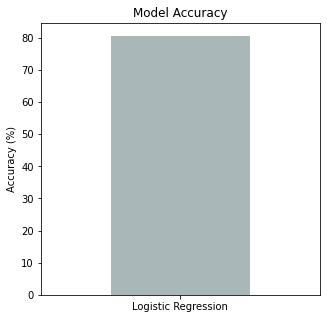


Confusion matrix of model 1 is :
[[1195  255]
 [ 321 1020]]

classification report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1450
           1       0.80      0.76      0.78      1341

    accuracy                           0.79      2791
   macro avg       0.79      0.79      0.79      2791
weighted avg       0.79      0.79      0.79      2791


Testing Accuracy:  79.36223575779292
Sensitivity:  0.7882585751978892
specificity:  0.8
false positive:  0.2
false negative:  0.2117414248021108



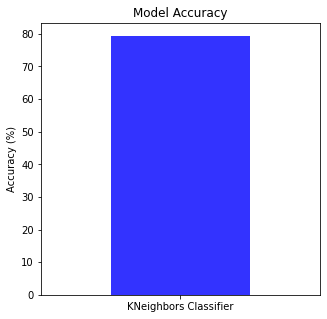


Confusion matrix of model 2 is :
[[1242  208]
 [ 523  818]]

classification report: 
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1450
           1       0.80      0.61      0.69      1341

    accuracy                           0.74      2791
   macro avg       0.75      0.73      0.73      2791
weighted avg       0.75      0.74      0.73      2791


Testing Accuracy:  73.80867072733788
Sensitivity:  0.7036827195467422
specificity:  0.797270955165692
false positive:  0.20272904483430798
false negative:  0.2963172804532578



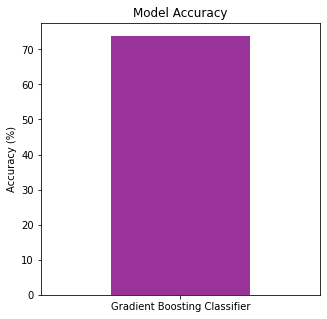


Confusion matrix of model 3 is :
[[1170  280]
 [ 275 1066]]

classification report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1450
           1       0.79      0.79      0.79      1341

    accuracy                           0.80      2791
   macro avg       0.80      0.80      0.80      2791
weighted avg       0.80      0.80      0.80      2791


Testing Accuracy:  80.11465424579004
Sensitivity:  0.8096885813148789
specificity:  0.7919762258543833
false positive:  0.20802377414561665
false negative:  0.1903114186851211



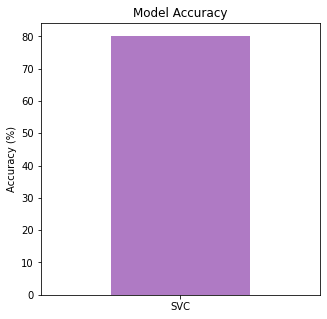

In [489]:
from sklearn.metrics import confusion_matrix,classification_report, log_loss
from sklearn import metrics

for i in range(len(model)):
  print('Confusion matrix of model',i, 'is :')
  cm = confusion_matrix(y_test,model[i].predict(X_test))
  tp = cm[0][0]
  tn = cm[1][1]
  fp = cm[0][1]
  fn = cm[1][0]
  print(cm)
  print()
  r = classification_report(y_test,model[i].predict(X_test))
  print("classification report: ",)
  print(r)
  print()
  var = ((tp+tn)/(tp+tn+fp+fn))*100
  print('Testing Accuracy: ',var)
  print('Sensitivity: ',tp/(tp+fn))
  print('specificity: ',tn/(tn+fp))
  print('false positive: ',fp/(fp+tn))
  print('false negative: ',fn/(fn+tp))
  print()
  
  n = ['Logistic Regression', 'KNeighbors Classifier', 'Gradient Boosting Classifier', 'SVC']
  col_value = ['#95a5a6', 'Blue', 'purple', '#9b59b6']
  model_acc = pd.Series(data=[var], index=[n[i]])
  fig = plt.figure(figsize=(5,5))
  width = 0.75
  model_acc.sort_values().plot.bar(alpha=0.8, color=[col_value[i]])
  plt.xticks(rotation=0)
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy (%)')
  plt.show()
  print()